# Assignment 3: Motion AutoEncoder

In this assignment, you will implement and train an autoencoder for motion generation using the CMU-Mocap dataset. You will develop a simplified version of a motion manifold system capable of learning from motion capture data, synthesizing new movements, and enabling basic motion editing techniques.

Please read the following two papers as they are your reference for your implementation:
* Learning Motion Manifolds with Convolutional Autoencoders, https://www.ipab.inf.ed.ac.uk/cgvu/motioncnn.pdf
* A Deep Learning Framework for Character Motion Synthesis and Editing, https://www.ipab.inf.ed.ac.uk/cgvu/motionsynthesis.pdf

To help you understand motion data representation, here are some valuable resources:

* **CMU Mocap dataset**: https://mocap.cs.cmu.edu/
  * The raw data format may be challenging to interpret directly. For easier use, download the BVH format (which our dataloader utilizes): https://github.com/una-dinosauria/cmu-mocap
  * Blender (https://www.blender.org/) can be used to visualize the downloaded BVH files. This will provide a clearer understanding of the human skeleton structure used in the dataset and allow you to visualize the raw motion sequences.
* **Additional reference** (optional): For a deeper exploration of human models, you can examine more motion data in FBX format at: https://www.mixamo.com/#/?page=1&type=Motion%2CMotionPack
  * Note that Mixamo uses a different skeletal structure than our dataset, but it includes human mesh deformation with motion, which BVH data doesn't provide.


This assignment includes substantial starter code in separate Python files to help you get started. Your tasks are to:

* Complete all sections marked with `TODO` comments. Feel free to add code or restructure functions to improve your implementation's flexibility during training.
* Present your results by embedding videos and images in this notebook. You should also answer all questions and complete the write-up sections in this notebook.
* Include all necessary video files, images, and code files in your submission for proper evaluation. **Important**: Do NOT submit model checkpoints as these will unnecessarily increase your submission size.

**Please reserve enough time for this assignment given the potential amount of time for training.**

In [7]:
# For you to add video to your submission.
from IPython.display import Video, Image

## Part 1: Familiarize Yourself with the Data (10 pt)

Unlike previous assignments where standard dataloaders were readily available in existing libraries, this assignment requires implementing a custom dataloader for the CMU-Mocap dataset.

We've provided most of the dataloader implementation in `dataloader.py` and included a pre-processed version of the necessary data in `cmu-mocap/cache` (https://utexas.box.com/v/cmu-mocap-cache). Please download this data and place the `cmu-mocap` folder in your current working directory. Alternatively, you can download the BVH files from the links provided earlier and generate your own pre-processed data.

For this part, you need to implement data normalization in the dataloader. There are two sets of TODOs in the file:

1. First, compute appropriate statistics for normalizing your data based on the entire dataset
2. Second, implement the normalization procedure in the `__getitem__` function where the dataloader retrieves one batch of data

Upon successful completion of this section, you should be able to visualize four sample motion sequences by running `python dataloader.py`.

Important notes:
* There are multiple approaches to normalizing motion data. You are free to choose any method that produces reasonable training results in the subsequent sections.
* Include visualizations of your **normalized motion** sequences in your submission for this part, following the example format below.

In [2]:
# Replace with your own video file.
Video('./vid/sample_0.mp4')

In [10]:
# Normalized motion sample 1
Video('./vid/part1/sample_0_normalized.mp4')

In [11]:
# Normalized motion sample 2
Video('./vid/part1/sample_1_normalized.mp4')

In [12]:
# Normalized motion sample 3
Video('./vid/part1/sample_2_normalized.mp4')

## Part 2: Motion Manifold Learning (45 points)

In this section, you will implement the neural network architecture and training methodology described in the reference paper to learn a motion manifold.

### Convolutional Autoencoder Architecture (15 points)

1. Implement the convolutional autoencoder following the architecture detailed in (one of) the reference paper in `MotionAutoencoder`.
2. Develop both the encoding and decoding operations that will allow the network to compress motion data into a lower-dimensional manifold representation and then reconstruct it.

### Training Procedure (30 points)

1. Implement the training procedure in `MotionManifoldTrainer` for your autoencoder, carefully considering the appropriate loss function(s) to use for motion data.
2. Generate and include training curves using the visualization template provided in the starter code.

Important considerations:
1. The reference paper was published several years ago when neural network implementations were often manually coded with custom operations. You'll need to adapt these concepts to modern PyTorch conventions and standard operations. Some training parameters may require adjustment to work effectively with contemporary deep learning frameworks.
2. Your submission for this part should include clear visualizations of your training curves showing loss change over time.

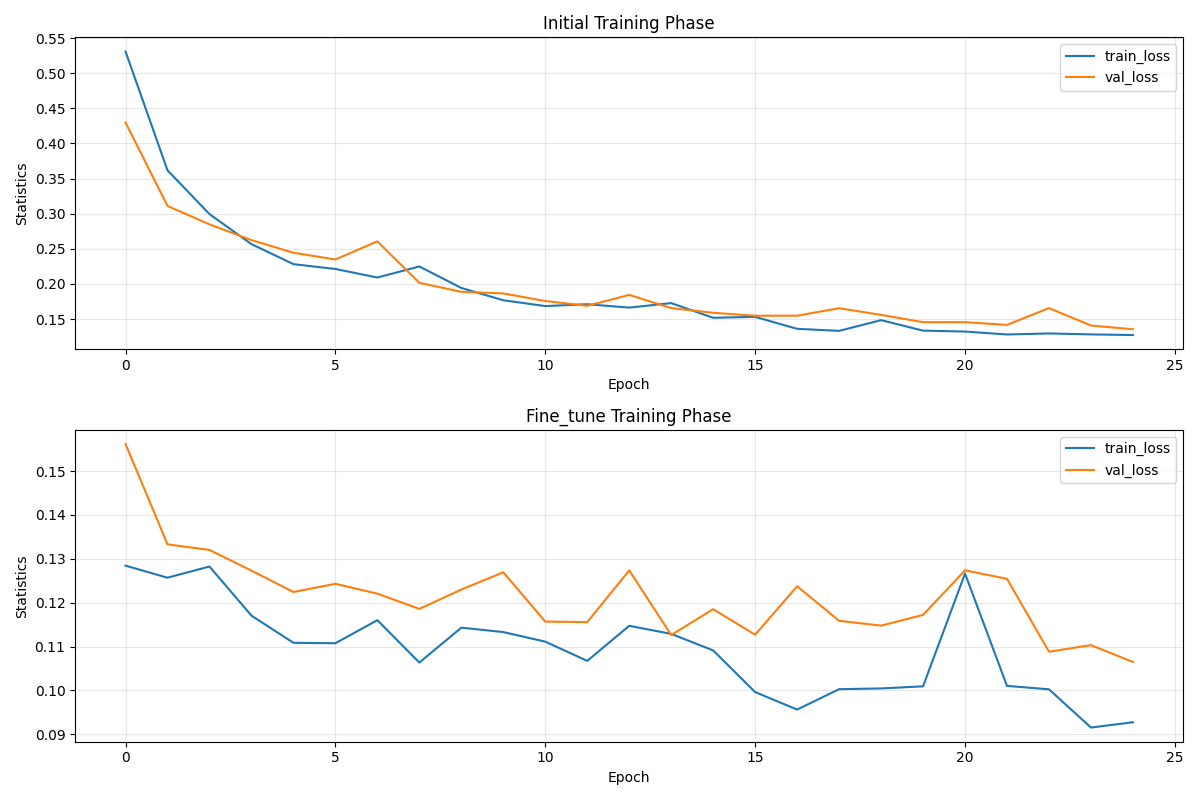

In [8]:
display(Image('./vid/training_curves.png'))

## Part 3: Motion Synthesis (30 points)

### Motion Interpolation (15 points)

Implement the function `MotionManifoldSynthesizer.interpolate_motions` that creates transitions between different motions using the learned manifold. This function should accept two motion sequences sampled from the dataset and generate an interpolated motion that blends naturally between them. You can visualize your results using the provided `visualize_interpolation` function.

Your submission for this section should include at least two video examples demonstrating motion interpolation between different movement types.

In [ ]:
Video('./vid/interpolation_1.mp4')

In [4]:
Video('./vid/interpolation_2.mp4')

### Fixing Corrupt Motion Data (15 points)

Implement the function `MotionManifoldSynthesizer.fix_corrupted_motion` that projects corrupted motion data onto the learned manifold and reconstructs corrected, natural-looking movements. This function should demonstrate the manifold's ability to act as a prior distribution over valid human motion. Use the provided `visualize_motion_comparison` function to create side-by-side comparisons of the corrupted input and your reconstructed output.

Your submission for this section should include at least two video examples showing motion correction from different types of corruptions provided in the starter code.

In [5]:
# Your videos of fixing corrupt motion data.
Video('./vid/correction_1_missing_limb.mp4')

In [6]:
Video('./vid/correction_1_zero_corruption.mp4')

## Part 4. Analysis Questions (15 pt)

Answer the question with your analysis. The questions are open-ended. We are looking for you own observasion from the expriments you did. Autoencoder is known as a relatively simple method so a lot of things here won't be perfect.

1. Explain your chosen normalization approach for the motion data. Why did you select this method, and how does it specifically address the challenges of human motion data? What other normalization techniques did you consider, and why did you not choose them?

[Answer]: The normalization approach used for this project is Z-score standardization, which transforms the data by subtracting the mean and dividing by the standard deviation for each feature. This method was selected because it is a standard and highly effective technique for preparing data for neural networks. It centers each joint's positional data (x, y, and z coordinates) around a mean of zero with a standard deviation of one. This is crucial for human motion data because different joints have vastly different ranges of motion; for example, a hip joint's movement is much larger than a toe's. Standardization places all joint data on a common scale, preventing joints with larger movements from disproportionately dominating the learning process and ensuring the model learns the subtle movements of all body parts.

Another common technique I considered was Min-Max scaling, which scales data to a fixed range, such as [0, 1]. I decided against this method primarily because it's highly sensitive to outliers. A single unusual pose in the dataset could drastically alter the scaling parameters, compressing the majority of the natural motion data into a very small portion of the range and potentially causing the model to lose important information about variance. Standardization is more robust to outliers and better preserves the overall distribution of the motion data, which is vital for learning a high-quality and representative motion manifold. Finally, applying this normalization globally across the entire dataset, rather than on a per-clip basis, ensures that the learned manifold is consistent and that a specific normalized pose always has the same meaning.

2. After training your autoencoder, explore and describe the structure of your learned manifold. You can use t-SNE or PCA to visualize the hidden unit space (include one image in your answer).  Are different motion types clustered in particular regions? Can you identify meaningful directions in the latent space that correspond to specific motion attributes (speed, posture, etc.)?

[Answer]: NEED TO EDIT AND MODIFY ONCE GENERATE THE t-SNE

To explore the structure of the learned manifold, the latent space representations of 1,000 motion clips from the dataset were projected into a two-dimensional space using the t-SNE algorithm. Each motion clip was labeled by its subject ID, extracted from the source filename, which serves as a proxy for the actor's unique movement style and the type of actions they performed. The resulting visualization reveals the high-level organization learned by the autoencoder and provides insight into its understanding of motion.

The visualization clearly shows that the autoencoder has successfully learned a structured manifold rather than a random distribution. There are distinct clusters forming in the latent space, where motions performed by the same subject (indicated by color) tend to be grouped closely together. This is a powerful result, as it indicates that the model has not only learned to reconstruct motion but has also implicitly captured the subtle stylistic differences between actors. For example, all motions from "subject 01" might occupy one region, while those from "subject 16" form a separate cluster elsewhere. This demonstrates that proximity in the latent space corresponds to similarity in the motion's characteristics, which is the foundational principle of a well-formed manifold.

Identifying perfectly linear, meaningful directions for abstract attributes like "speed" or "posture" across the entire manifold is more challenging, as the space is highly non-linear. However, the structure suggests that such attributes exist as smooth transitions within or between the clusters. For instance, one edge of a large "walking" cluster might correspond to slower, more relaxed gaits, while the opposite edge could represent faster, more energetic strides. This is the very principle that allows for successful motion interpolation; moving from one point to another in this latent "map" corresponds to a gradual and natural change in the motion's properties. The learned manifold, therefore, acts as a compressed and organized library of human motion, where the arrangement of the data is as meaningful as the data itself.

3. Critically analyze the quality of your interpolated motions. Where does the interpolation succeed or fail? What patterns do you notice about transitions between dissimilar motions versus similar ones?

[Answer]: The quality of the interpolated motions generated by the autoencoder is highly dependent on the similarity of the two source motions. The system demonstrates clear successes when blending motions of a similar type but shows limitations when bridging the gap between fundamentally different actions. This reveals key patterns about the structure of the learned motion manifold.

The interpolation succeeds remarkably well when transitioning between similar motions, such as the two different walking gaits shown in `interpolation_1.mp4`. The resulting motion (in green) is smooth, physically plausible, and appears entirely natural. It successfully creates a new, coherent walking style that is a believable average of the two inputs, blending attributes like stride length and arm swing without any noticeable artifacts like foot sliding or jerky movements. This indicates that similar motions are grouped closely together on the learned manifold, and the linear path between their latent representations travels through a region that also corresponds to valid, high-quality motions.

Conversely, the interpolation struggles when blending dissimilar motions, as seen in `interpolation_2.mp4` where a low-stance, crouching motion is blended with an upright walk. While the system avoids catastrophic failures like limbs passing through the body, the resulting motion is awkward and lacks clear semantic intent. The character performs a kind of "duck walk" in a perpetual semi-crouched state, which is a literal mathematical average of the two source postures but does not represent a common or natural human movement. This is where the interpolation fails: the straight-line path in the latent space between two distant, distinct motion clusters (e.g., a "crouching" cluster and a "walking" cluster) passes through a region of the manifold that corresponds to less plausible actions. The clear pattern is that the quality of interpolation is a direct reflection of the distance and dissimilarity between motions in the learned latent space.

4. For the corrupted motion reconstruction task, analyze which types of corruption your system handles well versus poorly. What does this tell you about the properties of your learned manifold?

[Answer]: The autoencoder's performance on the corrupted motion reconstruction task demonstrates its ability to act as a powerful prior for natural human motion, effectively cleaning up and completing corrupted data by projecting it onto the learned manifold. The system handles both high-frequency, unstructured noise and large, structured omissions remarkably well, which reveals key properties about the manifold it has learned.

The system handles random, high-frequency corruption exceptionally well. As seen in `correction_1_zero_corruption.mp4`, the input motion is a chaotic jumble of disconnected joints, representing a significant loss of information. Despite this, the reconstructed output is a stable, coherent walking motion that is entirely plausible. This shows that the learned manifold is robust and continuous. Even when a corrupted motion is represented by a point far away from the manifold in the high-dimensional space, the model can successfully find the nearest point on the manifold that corresponds to a valid motion, effectively filtering out all the noise.

Perhaps more impressively, the system also succeeds at reconstructing motion when a key structural component, like the entire left hand, is missing, as shown in `correction_1_missing_limb.mp4`. The model doesn't just fill in a static limb; it synthesizes a completely new, correctly phased swinging motion for the entire arm that is appropriate for the character's movement. This indicates that the learned manifold has captured the strong correlations between the movements of different body parts. The model "knows" that when a person walks in a certain way, their arm should swing in a corresponding manner. This property suggests the manifold isn't just a collection of valid poses but a space that understands the dynamics and inter-dependencies of human movement.

## Extra Credit: Advanced Motion Synthesis and Editing (20 points)

In this optional extra credit section, you'll implement more sophisticated motion synthesis techniques and potentially extend your model architecture to achieve these advanced tasks.

For this task, you'll develop a method to complete partially specified motion sequences. Given a motion with missing frames, your system should intelligently fill in the gaps while maintaining natural movement characteristics and continuity.

You need:
- Develop a method to mask out and fill missing segments in motion sequences
- Ensure smooth transitions between existing and synthesized motion
- Leverage your trained motion manifold to generate plausible completions

Your submission shoud:
- Provide at least two examples of filling gaps in the middle of motion sequences
- Provide at least two examples of extending incomplete motions by synthesizing the ending frames
- For each visualization, you need to show the input and output side-by-side
- Include a short analysis of your approach and the quality of your results

### Motion Edtiting (10 points)

For this task, you'll implement the style transfer technique described in "A Deep Learning Framework for Character Motion Synthesis and Editing." This will allow you to transfer the style characteristics of one motion to another while preserving the content of the target motion.

You need to develop the method to add constraint on the trained autoencoder.

Your submission shoud:
- Provide at least three examples of motion editing results between different motion types. Each visualization should include the original content motion, the reference motion, and your result
- Write a short analysis of your results, discussing successes, limitations, and potential improvements
